# EDA of Titanic
Today we try to do a simply analize of the famouse Titanic dataset. Wish me luck and let's get started!

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df_full = pd.read_csv('train.csv')
df_full 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Here we remove useless for us information about name, ticket and cabin of passengers. And PassengerId

In [63]:
df = df_full.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], 1)

In [64]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

Variables **Survived**, **Plass**, **Sex**, **SibSp**, **Parch** should be categorial. But just to try to make a correlation matrix, so let's keep them int64 and float64. We will close our eyes and use Spearman nonparametric test.  
Correlation matrix:

In [211]:
df.corr(method='spearman')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.339668,-0.052565,0.088879,0.138266,0.323736
Pclass,-0.339668,1.000000,-0.361666,-0.043019,-0.022801,-0.688032
Age,-0.052565,-0.361666,1.000000,-0.182061,-0.254212,0.135051
SibSp,0.088879,-0.043019,-0.182061,1.000000,0.450014,0.447113
Parch,0.138266,-0.022801,-0.254212,0.450014,1.000000,0.410074
Fare,0.323736,-0.688032,0.135051,0.447113,0.410074,1.000000


From this table we can see, that survival is negatively correlated with ticket class. Moreover, we see positive corraletion with fare, but corralation between fare and class in negative, this is strange. And this result doesn't count the sex. So let's repeat this matrix using sex grouping:

In [67]:
df.groupby('Sex').corr(method='spearman')

Survived    Pclass       Age     SibSp     Parch      Fare
Sex                                                                        
female Survived  1.000000 -0.487674  0.110685 -0.165119 -0.171624  0.222965
       Pclass   -0.487674  1.000000 -0.376345  0.026653  0.097829 -0.760104
       Age       0.110685 -0.376345  1.000000 -0.120823 -0.202991  0.237528
       SibSp    -0.165119  0.026653 -0.120823  1.000000  0.303626  0.357029
       Parch    -0.171624  0.097829 -0.202991  0.303626  1.000000  0.292335
       Fare      0.222965 -0.760104  0.237528  0.357029  0.292335  1.000000
male   Survived  1.000000 -0.204789 -0.078282  0.074970  0.134543  0.233587
       Pclass   -0.204789  1.000000 -0.383040 -0.044291 -0.046264 -0.635309
       Age      -0.078282 -0.383040  1.000000 -0.208026 -0.268903  0.115830
       SibSp     0.074970 -0.044291 -0.208026  1.000000  0.534184  0.435412
       Parch     0.134543 -0.046264 -0.268903  0.534184  1.000000  0.410679
       Fare      0.233587 -0.635309  0.115830  0.435412  0.410679  1.000000

This is more interesting: now we can think, that it is more dangerous for men to be in the first class than it is for women

Now let's make it right and do type transformation:

In [58]:
df = df.astype({'Survived': 'category',
               'Pclass': 'category',
               'Sex': 'category',
               'SibSp': 'category',
               'Parch': 'category'
               })

In [59]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Check for missing values:

In [60]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

We have a lot of NA in variable **Age** and two in **Embarked**. We believe, that the best way is don't remove these observation from the whole, but we will take this into account when we work with these variables

Let's answer some questions:

## 1. How does gender affect your chance of survival?

In [212]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Text(0.5, 1, 'How many men and women survived?')

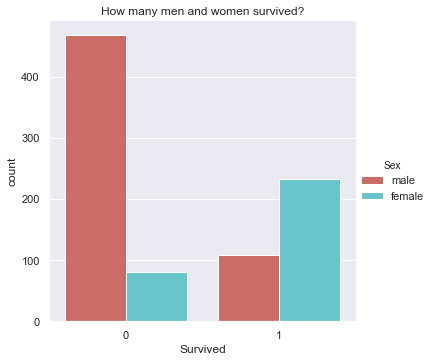

In [126]:
sns.catplot("Survived", data=df, hue='Sex', kind="count", palette = "hls")
plt.title('How many men and women survived?')

## 2. How does class affect your chance of survival?

In [117]:
df.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

Text(0.5, 1, 'Distribution of the survivors and the dead by class')

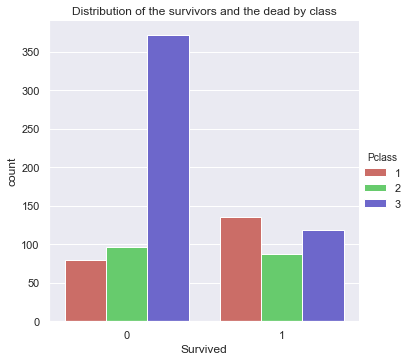

In [127]:
sns.catplot("Survived", data=df, hue='Pclass', kind="count", palette = "hls")
plt.title('Distribution of the survivors and the dead by class')

Interesting: the number of survived people is almost ythe same by class. But the number of dead in third class is much more than in the first and second classes.  
Now let's check, how the probability of survival depends on gender AND class:

In [120]:
df.groupby(['Pclass', 'Survived', 'Sex'])['Survived'].count()

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
Name: Survived, dtype: int64

Text(0.5, 1.1, 'Dead or no dead by class and gender')

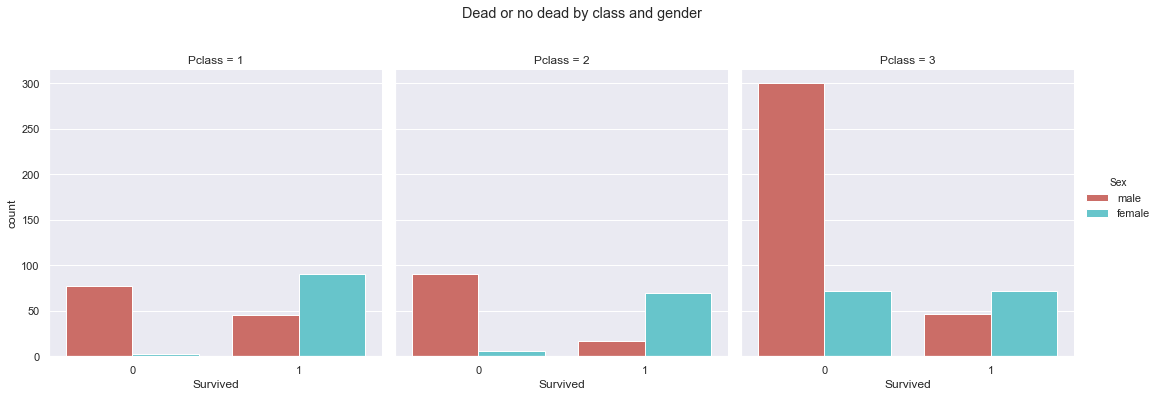

In [138]:
sns.catplot("Survived", hue="Sex", col="Pclass",
            data=df, palette="hls", kind="count")
plt.suptitle('Dead or no dead by class and gender', y = 1.1)

From above plot we see, that the best way to survive in Titanic's shipwreck in to be a man in third class

## 3. How age affect your chance of survival?

As you can remember, we had a lot of missing values in the variable **Age**. For further analysis, we need to remove them.

In [144]:
df_dropna = df.dropna(subset=['Age'], axis=0, how='any')
df_dropna

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [143]:
df_dropna.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Let's look at the distribution af the age by passengers:

In [146]:
df_dropna.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Text(0.5, 1.0, 'Dicstribution fo the age')

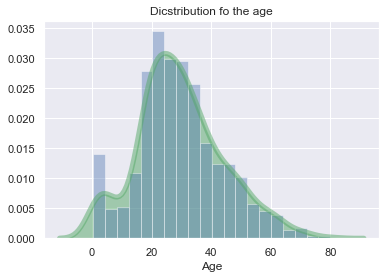

In [158]:
sns.distplot(df_dropna["Age"], hist=True, kde=True,
            kde_kws={"color": "g", "alpha": 0.5, "linewidth": 5, "shade": True})
plt.title('Dicstribution of the age')

Text(0.5, 1.0, 'Distribution of age by the gender')

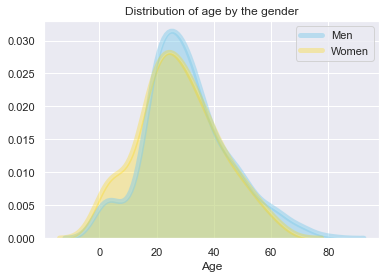

In [203]:
sns.distplot(df_dropna[df_dropna["Sex"] == 'male']['Age'], hist = False, kde = True, label='Men',
            kde_kws={"color": "skyblue", "alpha": 0.5, "linewidth": 5, "shade": True})
sns.distplot(df_dropna[df_dropna["Sex"] == 'female']['Age'], hist = False, kde = True, label='Women',
            kde_kws={"color": "gold", "alpha": 0.3, "linewidth": 5, "shade": True})
plt.legend()
plt.title('Distribution of age by the gender')

Age of men and women is almost the same. Look at the distribution of the age by the class:

Text(0.5, 1.0, 'Distribution of age by the class')

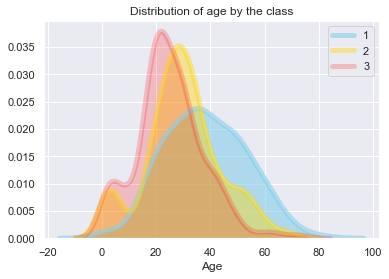

In [190]:
sns.distplot(df_dropna[df_dropna["Pclass"] == 1]['Age'], hist = False, kde = True, label='1',
            kde_kws={"color": "skyblue", "alpha": 0.6, "linewidth": 5, "shade": True})
sns.distplot(df_dropna[df_dropna["Pclass"] == 2]['Age'], hist = False, kde = True, label='2',
            kde_kws={"color": "gold", "alpha": 0.4, "linewidth": 5, "shade": True})
sns.distplot(df_dropna[df_dropna["Pclass"] == 3]['Age'], hist = False, kde = True, label='3',
            kde_kws={"color": "red", "alpha": 0.2, "linewidth": 5, "shade": True})
plt.legend()
plt.title('Distribution of age by the class')

Look at the boxplot:

Text(0.5, 1.0, 'Distribition of age by class')

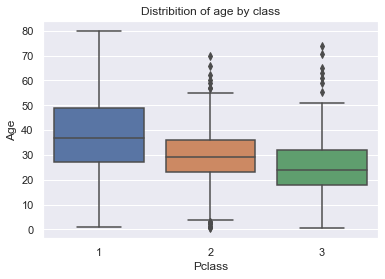

In [208]:
sns.boxplot(x='Pclass', y='Age', data=df_dropna)
plt.title('Distribition of age by class')

We can suggest, the older the person, the higher the ticket class. But this is not statistically significant.

Compare ages of survived and dead passengers:

Text(0.5, 1.0, 'Survival and dead by age')

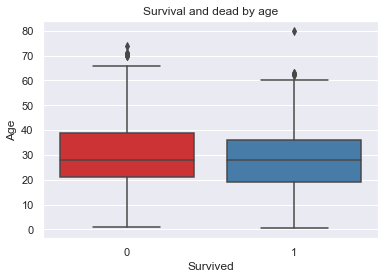

In [210]:
sns.boxplot(x=df_dropna['Survived'], y=df_dropna['Age'], palette='Set1')
plt.title('Survival and dead by age')

We can see, that the probability of surviving does not depend on the age of the passenger

## Conclusion. If you are buying a ticket for the Titanic, here are some tips:
* if you are a man - go the the class third
* if you are a woman - go to the class first or second
* if you are too old or too young - don't be afraid, your chances of survival do not depend on age

**Gook luck!!!**